In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('credit_card_data.csv')

In [0]:
df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [0]:
df.isnull().sum()

Merchant_id                       0
Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average Amount/transaction/day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Is declined                     3075 non-null   object 
 4   Total Number of declines/day    3075 non-null   int64  
 5   isForeignTransaction            3075 non-null   object 
 6   isHighRiskCountry               3075 non-null   object 
 7   Daily_chargeback_avg_amt        3075 non-null   int64  
 8   6_month_avg_chbk_amt            3075 non-null   float64
 9   6-month_chbk_freq               3075 non-null   int64  
 10  isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 264.4+ KB


In [0]:
df['Is declined'].value_counts()

N    3018
Y      57
Name: Is declined, dtype: int64

In [0]:
df['isFradulent'].value_counts()

N    2627
Y     448
Name: isFradulent, dtype: int64

In [0]:
df['isForeignTransaction'].value_counts()

N    2369
Y     706
Name: isForeignTransaction, dtype: int64

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['isForeignTransaction'] = le.fit_transform(df['isForeignTransaction'])
df['Is declined'] = le.fit_transform(df['Is declined'])
df['isHighRiskCountry'] = le.fit_transform(df['isHighRiskCountry'])
df['isFradulent'] = le.fit_transform(df['isFradulent'])

In [0]:
df['isForeignTransaction'].value_counts()

0    2369
1     706
Name: isForeignTransaction, dtype: int64

In [0]:
df['isFradulent'].value_counts()

0    2627
1     448
Name: isFradulent, dtype: int64

In [0]:
df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [0]:
df.columns

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f880dde71d0>,
      dtype=object)

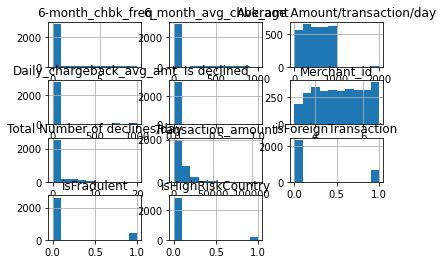

In [0]:
df.hist()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Target variable count')

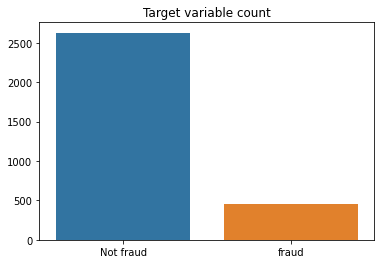

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

x=df['isFradulent'].value_counts().values
sns.barplot(['Not fraud','fraud'],x)
plt.title('Target variable count')

In [0]:
X = df.drop(['isFradulent'],axis=1)
y = df['isFradulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((2460, 10), (2460,), (615, 10), (615,))

In [0]:
X_train.columns

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq'],
      dtype='object')

In [0]:
X.columns

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq'],
      dtype='object')

In [0]:
#df_main = X_train
#df_main['isFradulent'] = y_train
df_new=pd.concat([X_train,y_train],axis=1)

In [0]:
df_new.head()
df_new.shape
df_new['isFradulent'].value_counts()


0    2115
1     345
Name: isFradulent, dtype: int64

## SMOTE

In [0]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto', random_state=None,k_neighbors=3)
X_train_res, y_train_res = sm.fit_sample(X, y) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
print("After applying SMOTE, counts '1': {}".format(sum(y_train_res == 1))) 
print("After applying SMOTE, counts '0': {}".format(sum(y_train_res == 0))) 


After applying SMOTE, counts '1': 2627
After applying SMOTE, counts '0': 2627


In [0]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123).fit(X_train_res, y_train_res)
#clf.predict(X_test)
clf.score(X_test, y_test)
clf.score(X_train_res, y_test_res)

0.16747967479674797

In [0]:
clf = LogisticRegression(random_state=123).fit(X_train, y_train)
clf.predict(X_test)

clf.score(X_test, y_test)

0.832520325203252

In [0]:
y_test.value_counts()

0    512
1    103
Name: isFradulent, dtype: int64

In [0]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model
#from sklearn.tree import DecisionTreeClassifier
cart = linear_model.LogisticRegression()
cart.fit(X_train,y_train)
predictions = cart.predict(X_train)
accuracy_LR = accuracy_score(predictions,y_train)
print(accuracy_LR)

0.8597560975609756


In [0]:
predictions = cart.predict(X_test)
accuracy_LR = accuracy_score(predictions,y_test)
print(accuracy_LR)

0.832520325203252
